In [1]:
push!(LOAD_PATH, "../../lib");

In [2]:
using NaCsCalc.Format: Unc
using PyPlot
using LsqFit

In [3]:
data = readcsv("data/Na_small_knife_x.csv", header=true)[1]

15×3 Array{Float64,2}:
 10.5   16.0    0.1  
 10.25  16.2    0.1  
 10.17  16.6    0.1  
 10.0   15.7    0.1  
  9.75  14.5    0.1  
  9.6    9.4    0.1  
  9.55   6.71   0.03 
  9.5    4.34   0.03 
  9.45   2.54   0.03 
  9.4    1.32   0.03 
  9.35   0.697  0.005
  9.3    0.345  0.005
  9.25   0.17   0.005
  9.05   0.012  0.005
  8.75   0.004  0.004

In [4]:
data[:, 1] .= data[:, 1] .* 2.54
# The first few data points includes clipping on the beam from somewhere else.
# Ignore them in the fitting
fitdata = data[4:end, :];

In [5]:
model(x, p) = p[1] .* (erf.((x .- p[2]) ./ p[3]) .+ 1)

model (generic function with 1 method)

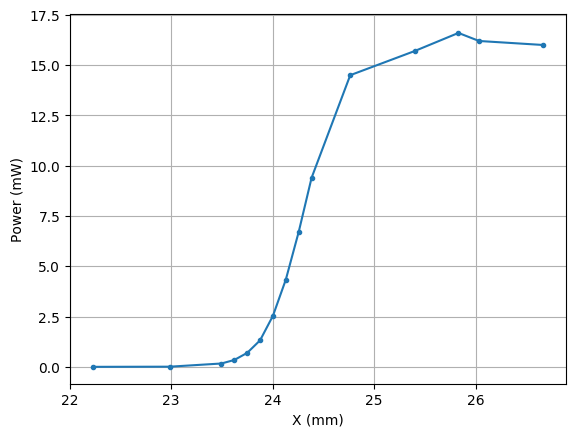

PyObject <matplotlib.text.Text object at 0x7f68bbf661d0>

In [6]:
errorbar(data[:, 1], data[:, 2], data[:, 3], fmt=".-")
grid()
xlabel("X (mm)")
ylabel("Power (mW)")

In [7]:
fit = curve_fit(model, fitdata[:, 1], fitdata[:, 2], [8.0, 24.3, 0.7])
err = estimate_errors(fit)
@show Unc.(fit.param, err);

Unc.(fit.param, err) = NaCsCalc.Format.Unc{Float64}[7.851(70), 24.3116(65), 0.445(11)]


The beam size is measured 33cm after the collimator.

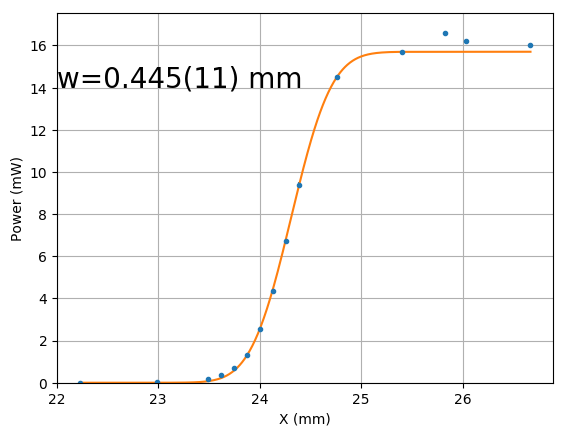

PyObject <matplotlib.text.Annotation object at 0x7f68b41de940>

In [8]:
errorbar(data[:, 1], data[:, 2], data[:, 3], fmt=".")
plotx = linspace(data[1, 1], data[end, 1], 1000)
plot(plotx, model.(plotx, (fit.param,)))
grid()
ylim([0, ylim()[2]])
xlabel("X (mm)")
ylabel("Power (mW)")
annotate("w=$(Unc(fit.param[3], err[3])) mm", xy=(0.0, 0.8), xycoords="axes fraction",
         size=20)